## Dehli Indian Housing Part 3 Predicting Price with Location: Latitude and Longitude using Multiple Linear Regression by Dumisani Maxwell Mukuchura

#### Dataset Source: *https://www.kaggle.com/datasets/bhavyadhingra00020/india-rental-house-price*

##### Contact: dumisanimukuchura@gmail.com | LinkedIn: https://www.linkedin.com/in/dumisani-maxwell-mukuchura-4859b7170/

##### This Project will explore the Dehli Indian Housing and build a model predicting rental price from Location i.e Latitude and Longitude. 

Building from Part 2 of this series we hall be looking into Location and its influence on the Price and if there is a positive correlation build a model to Predict Price using Location.

## 1. Prepare Data

### Module. Library and Data Imports

In [3]:
#Import Standard Libraries and module to be utilized

#For file and directory operations
import os

#Data Manipulation and Visualization Libraries
import pandas as pd
import matplotlib.pyplot as plt
import plotly.express as px
import seaborn as sns

#Model Related Libraries
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error
from sklearn.utils.validation import check_is_fitted

In [4]:
# Import Data building up from Part Two we shall import a Clean Dataframe

#Get the current working directory
current_dir = os.getcwd()

#Trim to one level above
base_dir = os.path.dirname(current_dir)

#Construct the path to get the Data Folder
data_dir = os.path.join(base_dir, "data")

#Construct the full path to the CSV file
csv_file_path = os.path.join(data_dir, "Dehli-Indian-Housing-Clean-Data.csv")

#Read the csv file into a DataFrame
housing_data = pd.read_csv(csv_file_path)

#Make a copy to keep the original dataset intact
housing_df = housing_data.copy()

housing_df.head()

,house_type,location,city,latitude,longitude,price,currency,numBathrooms,numBalconies,isNegotiable,priceSqFt,verificationDate,description,SecurityDeposit,Status,numBedroom,house_layout,house_size_in_sqft,price_approx_usd
0,Independent Floor,Guru Angad Nagar,Delhi,28.635309,77.224960,13000,INR,2.0,1.0,Negotiable,0.29,Posted 4 years ago,Itâs a 2 bhk builder floor situated in Guru ...,"13,000",Unfurnished,2,BHK,517.0,151.59
1,Independent House,Tuglak Road,Delhi,28.595453,77.210335,2162955,INR,4.0,2.0,Not Negotiable,4.03,Posted a year ago,Well designed 5 bhk independent house is avail...,"65,41,919",Unfurnished,5,BHK,6251.0,25221.02
2,Villa,Tuglak Road,Delhi,28.595453,77.210335,2010105,INR,4.0,2.0,Not Negotiable,4.21,Posted a year ago,Its four bhk villa in the super location of de...,"60,10,155",Unfurnished,4,BHK,5562.0,23438.72
3,Independent Floor,Saket,Delhi,28.523548,77.200142,235562,INR,3.0,2.0,Not Negotiable,0.96,Posted a year ago,Itâs a 3 bhk builder floor situated in Saket...,"7,51,225",Unfurnished,3,BHK,2855.0,2746.76
4,Independent Floor,Saket,Delhi,28.523548,77.200142,301011,INR,3.0,2.0,Not Negotiable,1.28,Posted a year ago,Well designed 3 bhk builder floor is available...,"10,10,202",Unfurnished,3,BHK,2741.0,3509.92


In [5]:
#Check the information of the DataFrame

housing_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2171 entries, 0 to 2170
Data columns (total 19 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   house_type          2171 non-null   object 
 1   location            2171 non-null   object 
 2   city                2171 non-null   object 
 3   latitude            2171 non-null   float64
 4   longitude           2171 non-null   float64
 5   price               2171 non-null   int64  
 6   currency            2171 non-null   object 
 7   numBathrooms        2171 non-null   float64
 8   numBalconies        2171 non-null   float64
 9   isNegotiable        2171 non-null   object 
 10  priceSqFt           2171 non-null   float64
 11  verificationDate    2171 non-null   object 
 12  description         2171 non-null   object 
 13  SecurityDeposit     2171 non-null   object 
 14  Status              2171 non-null   object 
 15  numBedroom          2171 non-null   int64  
 16  house_

## 2. Explore

### Further analysis into Location features against the Price

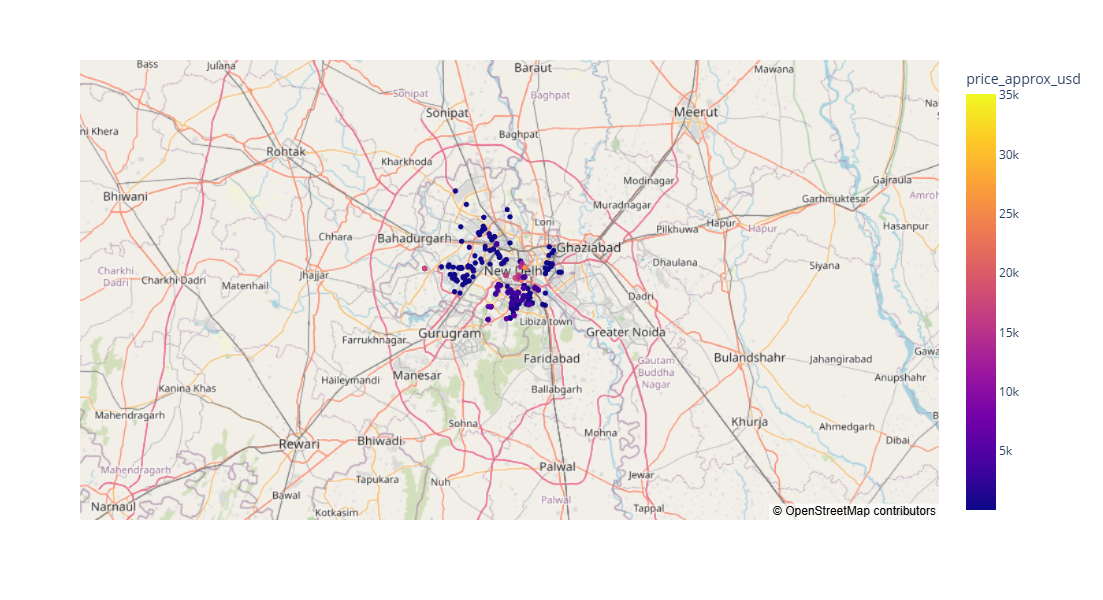

In [13]:
#Using Scatter Mapbox to understand how the Prices are spread around the location

fig = px.scatter_mapbox(
    housing_df,
    lat = "latitude",
    lon = "longitude",
    width = 1000,
    height = 600,
    color = "price_approx_usd",
    hover_data = ["price_approx_usd"]
)

fig.update_layout(mapbox_style= "open-street-map")

fig.show()

Expensive prorperties are concentrated in the heart of New Dehli and as we spred outwards the price reduces

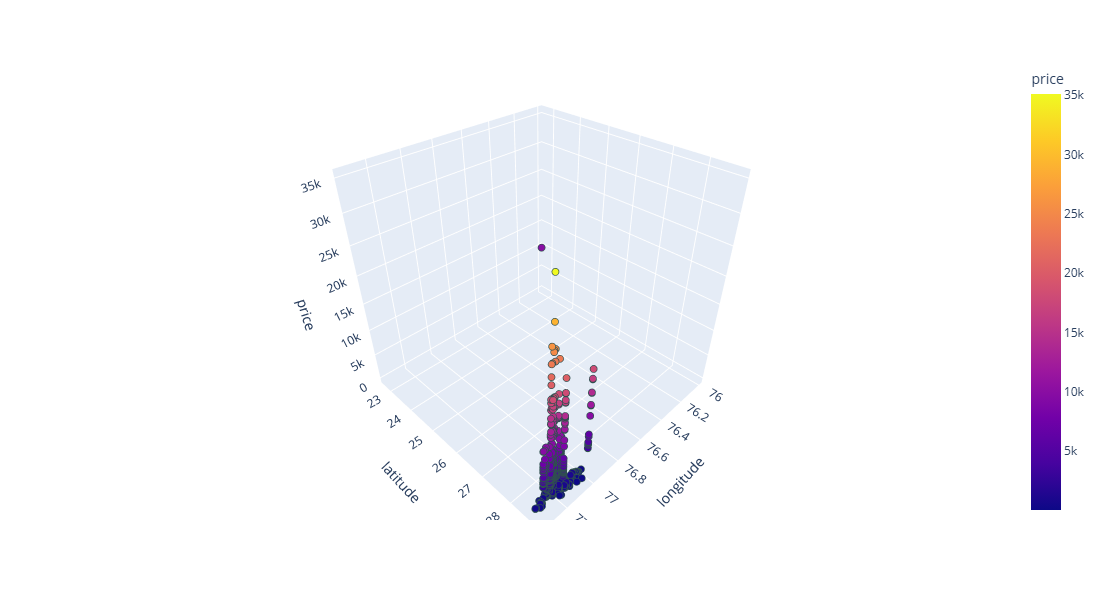

In [14]:
#Explore in 3D the relationship of Price with Latitude and Longitude

# Create 3D scatter plot
fig = px.scatter_3d(
    housing_df,
    x="longitude",
    y="latitude",
    z="price_approx_usd",
    labels={"longitude": "longitude", "latitude": "latitude", "price_approx_usd": "price"},
    color="price_approx_usd",
    width=600,
    height=600,
)

# Refine formatting
fig.update_traces(
    marker={"size": 4, "line": {"width": 2, "color": "DarkSlateGrey"}},
    selector={"mode": "markers"},
)

# Display figure
fig.show()

'\nannot=True will display the correlation values in each cell.\n\nfmt=".2f" will format the correlation values to two decimal places.\n\ncmap="coolwarm" is a colormap option for visual appeal (feel free to choose your preferred colormap).\n'

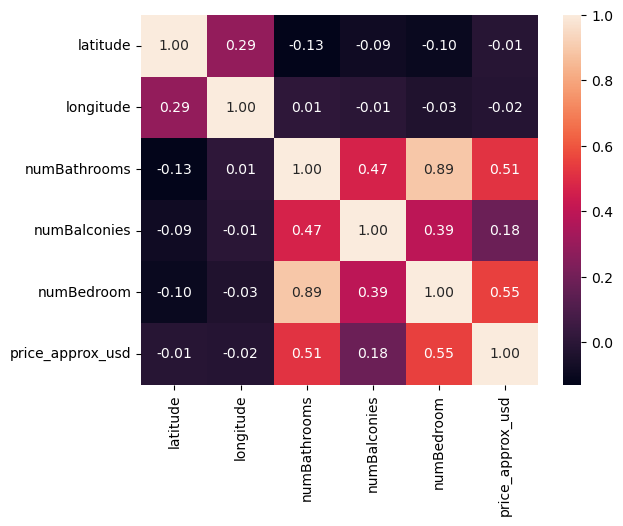

In [18]:
# Use a Heat Map to understand the Correlation of the Latitude, Longitude and Price

corr = housing_df.select_dtypes("number").drop(columns=["price", "priceSqFt", "house_size_in_sqft"]).corr()
sns.heatmap(corr, annot=True, fmt=".2f")

"""
annot=True will display the correlation values in each cell.

fmt=".2f" will format the correlation values to two decimal places.

cmap="coolwarm" is a colormap option for visual appeal (feel free to choose your preferred colormap).
"""

From this Heat map, we realize there is no Positive Correlation between location and price. We will continue to build a model and test its Mean Absolute Error and compare it to the one for the Number of Bedrooms and Number of Bathrooms which have better correlation.

We will introduce an exploration of Amenities within other features with a strong correlation here as the Number of Bathrooms and Number of Bedrooms we see a slight realizable correlation from the Number of Balconies 

## 3. Split

In [26]:
#Import Data to be used for Training from split we did from Part 2 of this series

#Get the current working directory
current_dir = os.getcwd()

#Trim to one level above
base_dir = os.path.dirname(current_dir)

#Construct the path to get the Data Folder
data_dir = os.path.join(base_dir, "data")

#Construct the full path to the CSV file
csv_file_path = os.path.join(data_dir, "housing_training_data.csv")

#Read the csv file into a DataFrame
housing_training_data = pd.read_csv(csv_file_path)

#Make a copy to keep the original dataset intact
housing_training = housing_training_data.copy()

print(housing_training.info())
housing_training.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1077 entries, 0 to 1076
Data columns (total 19 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   house_type          1077 non-null   object 
 1   location            1077 non-null   object 
 2   city                1077 non-null   object 
 3   latitude            1077 non-null   float64
 4   longitude           1077 non-null   float64
 5   price               1077 non-null   int64  
 6   currency            1077 non-null   object 
 7   numBathrooms        1077 non-null   float64
 8   numBalconies        1077 non-null   float64
 9   isNegotiable        1077 non-null   object 
 10  priceSqFt           1077 non-null   float64
 11  verificationDate    1077 non-null   object 
 12  description         1077 non-null   object 
 13  SecurityDeposit     1077 non-null   object 
 14  Status              1077 non-null   object 
 15  numBedroom          1077 non-null   int64  
 16  house_

,house_type,location,city,latitude,longitude,price,currency,numBathrooms,numBalconies,isNegotiable,priceSqFt,verificationDate,description,SecurityDeposit,Status,numBedroom,house_layout,house_size_in_sqft,price_approx_usd
0,Villa,Tuglak Road,Delhi,28.595453,77.210335,2010105,INR,4.0,2.0,Not Negotiable,4.21,Posted a year ago,Its four bhk villa in the super location of de...,"60,10,155",Unfurnished,4,BHK,5562.0,23438.72
1,Independent Floor,Saket,Delhi,28.523548,77.200142,235595,INR,3.0,2.0,Not Negotiable,0.96,Posted a year ago,Its three bhk builder floor in the super locat...,"7,54,225",Unfurnished,3,BHK,2856.0,2747.14
2,Independent Floor,Saket,Delhi,28.523548,77.200142,301012,INR,3.0,2.0,Not Negotiable,1.23,Posted a year ago,Well designed 3 bhk builder floor is available...,"10,11,001",Unfurnished,3,BHK,2856.0,3509.93
3,Independent Floor,Saket,Delhi,28.523548,77.200142,301012,INR,3.0,2.0,Not Negotiable,1.23,Posted a year ago,Its three bhk builder floor in the super locat...,"10,10,202",Unfurnished,3,BHK,2856.0,3509.93
4,Independent Floor,Maharani Bagh,Delhi,28.572620,77.264221,401015,INR,4.0,2.0,Not Negotiable,0.79,Posted a year ago,Its four bhk builder floor in the super locati...,"12,02,002",Unfurnished,4,BHK,5896.0,4676.01


In [46]:
#Convert the numBedroom to numBedrooms and also type to float

housing_training["numBedrooms"] = housing_training["numBedroom"].astype(float)
housing_training.drop(columns = ["numBedrooms"], inplace = True)

In [28]:
#Create the Target Vector and the Feature Matrix for Location Model
loc_target = "price_approx_usd"
loc_features = ["latitude", "longitude"]
loc_y_train = housing_training[loc_target]
loc_X_train = housing_training[loc_features]
print(loc_y_train.shape)
loc_X_train.head()

(1077,)


,latitude,longitude
0,28.595453,77.210335
1,28.523548,77.200142
2,28.523548,77.200142
3,28.523548,77.200142
4,28.572620,77.264221


### Baseline the Location Model

In [29]:
# Baseline the Location Model
loc_y_mean = loc_y_train.mean()
loc_y_pred_baseline = [loc_y_mean] * len(loc_y_train)
print(loc_y_pred_baseline[:5])
loc_baseline_mae = mean_absolute_error(loc_y_train, loc_y_pred_baseline)

print(f"The Mean of the Target Vector is ${round(loc_y_mean, 2)} and if we guessed it for every output we would be off by a +/- ${round(loc_baseline_mae,2)}")

[4733.04782729805, 4733.04782729805, 4733.04782729805, 4733.04782729805, 4733.04782729805]
The Mean of the Target Vector is $4733.05 and if we guessed it for every output we would be off by a +/- $1651.68


### Baseline the Amenities Model - Bathroom and Bedroom

In [31]:
#Create the Target Vector and the Feature Matrix for the Amenities Model
amn_target = "price_approx_usd"
amn_features = ["numBathrooms", "numBedrooms"]
amn_y_train = housing_training[amn_target]
amn_X_train = housing_training[amn_features]
print(amn_y_train.shape)
amn_X_train.head()

(1077,)


,numBathrooms,numBedrooms
0,4.0,4.0
1,3.0,3.0
2,3.0,3.0
3,3.0,3.0
4,4.0,4.0


In [32]:
# Baseline the Location Model
amn_y_mean = amn_y_train.mean()
amn_y_pred_baseline = [amn_y_mean] * len(amn_y_train)
print(amn_y_pred_baseline[:5])
amn_baseline_mae = mean_absolute_error(amn_y_train, amn_y_pred_baseline)

print(f"The Mean of the Target Vector is ${round(amn_y_mean, 2)} and if we guessed it for every output we would be off by a +/- ${round(amn_baseline_mae,2)}")

[4733.04782729805, 4733.04782729805, 4733.04782729805, 4733.04782729805, 4733.04782729805]
The Mean of the Target Vector is $4733.05 and if we guessed it for every output we would be off by a +/- $1651.68


As seen these have produced the same MAE because they both hinge on the mean of the target vector, Now let us explore more as we create model for each

### Iterate

### For the Location Model

In [33]:
### Instantiate the Location Model

loc_model = LinearRegression()

#Fit Location Model
loc_model.fit(loc_X_train, loc_y_train)

LinearRegression()

In [35]:
#Check if Model is fitted
check_is_fitted(loc_model)

In [36]:
#Check the Location Model against its own Training Data 
loc_y_pred_training = loc_model.predict(loc_X_train)
print(loc_y_pred_training[:5])

#Check the Location Model MAE 
loc_training_mae = mean_absolute_error(loc_y_train, loc_y_pred_training)

print(f"The Mean Absolute Error of the Location Model on the Training Data is ${round(loc_training_mae, 2)}") 

[5354.96088413 3816.39616439 3816.39616439 3816.39616439 4745.5575477 ]
The Mean Absolute Error of the Location Model on the Training Data is $1703.45


- The MAE of the Location Data increased from the Baseline model signfiying the Model is not good enough as we anticipated after noting the Correlation against Price. Now we move on to explore the Amenities Model

### For the Amenities Model

In [37]:
### Instantiate the Amenities Model

amn_model = LinearRegression()

#Fit Location Model
amn_model.fit(amn_X_train, amn_y_train)

LinearRegression()

In [38]:
#Check if Model is fitted
check_is_fitted(amn_model)

In [39]:
#Check the Amenities Model against its own Training Data 
amn_y_pred_training = amn_model.predict(amn_X_train)
print(amn_y_pred_training[:5])

#Check the Location Model MAE 
amn_training_mae = mean_absolute_error(amn_y_train, amn_y_pred_training)

print(f"The Mean Absolute Error of the Location Model on the Training Data is ${round(amn_training_mae, 2)}") 

[5298.17065616 3643.14684985 3643.14684985 3643.14684985 5298.17065616]
The Mean Absolute Error of the Location Model on the Training Data is $1525.08


- This MAE of the Amenites deacresed showing it is better than the Baseline Model signifying what we had earlier anticipated from veiwing the Correlation Heatmap with Price

### Checking Performance against Test Data

In [40]:
#Import Data to be used for Testing from split we did from Part 2 of this series

#Get the current working directory
current_dir = os.getcwd()

#Trim to one level above
base_dir = os.path.dirname(current_dir)

#Construct the path to get the Data Folder
data_dir = os.path.join(base_dir, "data")

#Construct the full path to the CSV file
csv_file_path = os.path.join(data_dir, "housing_test_data.csv")

#Read the csv file into a DataFrame
housing_test_data = pd.read_csv(csv_file_path)

#Make a copy to keep the original dataset intact
housing_test = housing_test_data.copy()

print(housing_test.info())
housing_test.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 19 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   house_type          100 non-null    object 
 1   location            100 non-null    object 
 2   city                100 non-null    object 
 3   latitude            100 non-null    float64
 4   longitude           100 non-null    float64
 5   price               100 non-null    int64  
 6   currency            100 non-null    object 
 7   numBathrooms        100 non-null    float64
 8   numBalconies        100 non-null    float64
 9   isNegotiable        100 non-null    object 
 10  priceSqFt           100 non-null    float64
 11  verificationDate    100 non-null    object 
 12  description         100 non-null    object 
 13  SecurityDeposit     100 non-null    object 
 14  Status              100 non-null    object 
 15  numBedroom          100 non-null    int64  
 16  house_lay

,house_type,location,city,latitude,longitude,price,currency,numBathrooms,numBalconies,isNegotiable,priceSqFt,verificationDate,description,SecurityDeposit,Status,numBedroom,house_layout,house_size_in_sqft,price_approx_usd
0,Villa,Shanti Niketan,Delhi,28.577921,77.169373,640101,INR,4.0,2.0,Not Negotiable,1.27,Posted 5 months ago,Its four bhk villa in the super location of De...,"20,10,202",Unfurnished,4,BHK,5896.0,7463.86
1,Independent Floor,Safdarjung Enclave,Delhi,28.561258,77.190521,381812,INR,3.0,2.0,Not Negotiable,1.56,Posted 2 months ago,Its three bhk builder floor in the super locat...,"10,18,282",Unfurnished,3,BHK,2856.0,4452.10
2,Independent Floor,Sarvodaya Enclave,Delhi,28.537661,77.202072,301012,INR,4.0,2.0,Not Negotiable,0.60,Posted 6 months ago,Its four bhk builder floor in the super locati...,"18,10,210",Unfurnished,4,BHK,5896.0,3509.93
3,Independent Floor,Greater kailash 1,Delhi,28.551750,77.233330,301012,INR,3.0,2.0,Not Negotiable,1.23,Posted a year ago,Well designed 3 bhk builder floor is available...,"10,20,202",Unfurnished,3,BHK,2856.0,3509.93
4,Independent Floor,Panchsheel Enclave,Delhi,28.543520,77.229736,235592,INR,3.0,2.0,Not Negotiable,0.96,Posted a year ago,Its three bhk builder floor in the super locat...,"7,51,225",Unfurnished,3,BHK,2856.0,2747.11


In [50]:
#Convert the numBedroom to numBedrooms and also type to float

housing_test["numBedrooms"] = housing_test["numBedroom"].astype(float)
housing_test.drop(columns = ["numBedroom"], inplace = True)

### Test the Location Model against Test Data

In [51]:
#Check the Performance of the Model on Test Data
loc_y_test = housing_test[loc_target]
loc_X_Test = housing_test[loc_features]
loc_y_pred_test = loc_model.predict(loc_X_Test)

loc_test_mae = mean_absolute_error(loc_y_test, loc_y_pred_test)
print("The Mean Absolute Error of the Location Model when tested on Test Data is $", loc_test_mae.round(2))

The Mean Absolute Error of the Location Model when tested on Test Data is $ 1313.17


### Test the Amenities Model against Test Data

In [52]:
#Check the Performance of the Model on Test Data
amn_y_test = housing_test[amn_target]
amn_X_Test = housing_test[amn_features]
amn_y_pred_test = amn_model.predict(amn_X_Test)

amn_test_mae = mean_absolute_error(amn_y_test, amn_y_pred_test)
print("The Mean Absolute Error of the Amenities Model when tested on Test Data is $", amn_test_mae.round(2))

The Mean Absolute Error of the Amenities Model when tested on Test Data is $ 1271.72


- Though we can realise improvments from both models still the Amenities model is better than the Location model as Amenity features Number of Bedrooms and Number of Bathrooms have more correlation with Price as compared to Location features: Latitude and Longitude